In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_excel(r'C:\Users\Lenovo\Desktop\Iris_Flask\Iris.xls')

In [3]:
df.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# to display stats about data
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepal_Length    150 non-null    float64
 1   Sepal_Width     150 non-null    float64
 2   Petal_Length    150 non-null    float64
 3   Petal_Width     150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no. of samples on each class
df['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

# Preprocessing

In [7]:
# check for null values
df.isnull().sum()

Sepal_Length      0
Sepal_Width       0
Petal_Length      0
Petal_Width       0
Classification    0
dtype: int64

There are no null values present

# EDA

<AxesSubplot:>

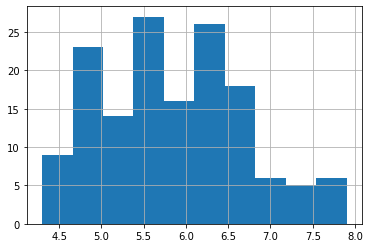

In [8]:
df['Sepal_Length'].hist()

<AxesSubplot:>

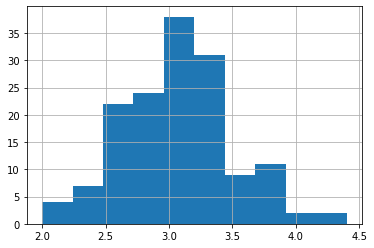

In [9]:
df['Sepal_Width'].hist()

<AxesSubplot:>

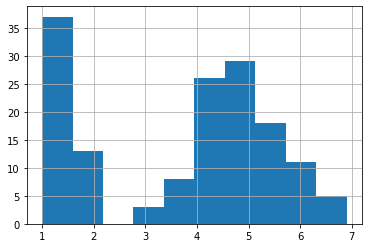

In [10]:
df['Petal_Length'].hist()

<AxesSubplot:>

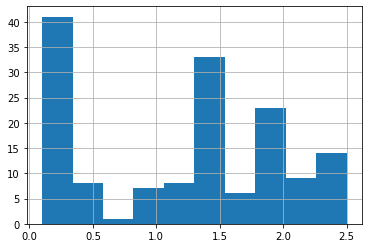

In [11]:
df['Petal_Width'].hist()

In [12]:
colors = ['red', 'orange', 'green']
Classification = ['Iris-virginica','Iris-versicolor','Iris-setosa']

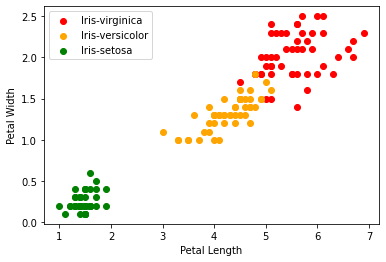

In [13]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['Petal_Length'], x['Petal_Width'], c = colors[i], label=Classification[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

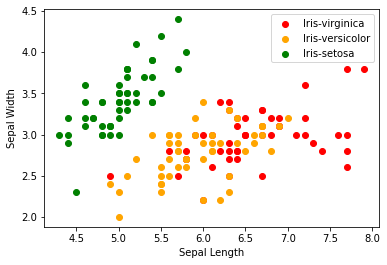

In [14]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['Sepal_Length'], x['Sepal_Width'], c = colors[i], label=Classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

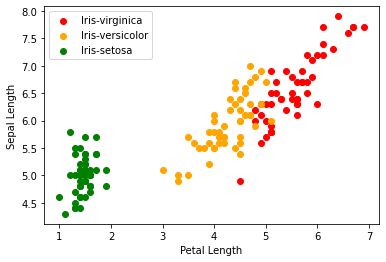

In [15]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['Petal_Length'], x['Sepal_Length'], c = colors[i], label=Classification[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()

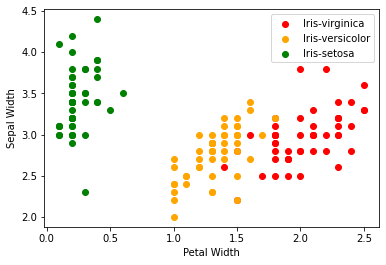

In [16]:
for i in range(3):
    x = df[df['Classification'] == Classification[i]]
    plt.scatter(x['Petal_Width'], x['Sepal_Width'], c = colors[i], label=Classification[i])
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.legend()

In [17]:
#Correlation Matrix
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

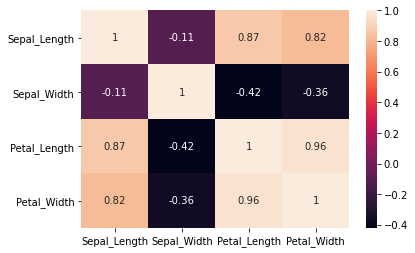

In [18]:
corr=df.corr()
sns.heatmap(corr, annot=True)

Label Encoding


In [19]:
#Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form
le = LabelEncoder()

In [20]:
df['Classification'] = le.fit_transform(df['Classification'])
df.tail(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Classification
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Model Training

In [35]:
from sklearn.model_selection import train_test_split
#Splitting the data set into target and features
x=df.drop(['Classification'],axis=1) 
y=pd.DataFrame(df['Classification'])


# Spliting the dataset for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [36]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [37]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [38]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


From results we have accuracy of 100 percent for all models.